<a href="https://colab.research.google.com/github/Alexbox360/Data-Science/blob/main/SC53_Reto_Jes%C3%BAsAlejandroMurilloP%C3%A9rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statistics as st
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

In [ ]:
Ori = pd.read_excel("/content/Datos.xlsx",sheet_name="DatosOriginales")
Reg = pd.read_excel("/content/Datos.xlsx",sheet_name="datos para regresión")

Promedio del costo del boleto =  376.3703703703704


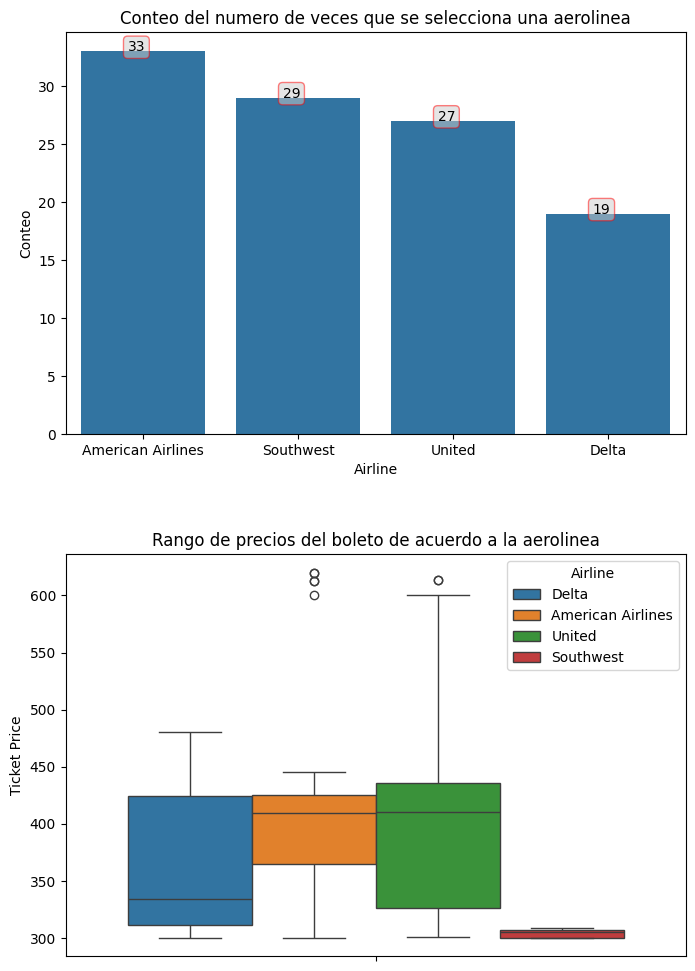

In [ ]:
values = Ori["Airline"].value_counts()
fig, ax = plt.subplots(2,figsize=(8,12))
plt.subplots_adjust( hspace=0.3)
sns.barplot(data=values, ax = ax[0])
bbox = dict(boxstyle="round", fc="0.8", alpha = 0.5, color = "red")
ax[0].annotate(str(values[0]), xy=(0.1, 0.1),xytext=(-0.1, values[0]),bbox=bbox)
ax[0].annotate(str(values[1]), xy=(0.1, 0.1),xytext=(.9, values[1]),bbox=bbox)
ax[0].annotate(str(values[2]), xy=(0.1, 0.1),xytext=(1.9, values[2]),bbox=bbox)
ax[0].annotate(str(values[3]), xy=(0.1, 0.1),xytext=(2.9, values[3]),bbox=bbox)
ax[0].set_ylabel('Conteo')
ax[0].set_title("Conteo del numero de veces que se selecciona una aerolinea")
sns.boxplot(y=Ori["Ticket Price"],hue=Ori["Airline"])
ax[1].set_title("Rango de precios del boleto de acuerdo a la aerolinea")
print("Promedio del costo del boleto = ", Ori["Ticket Price"].mean())

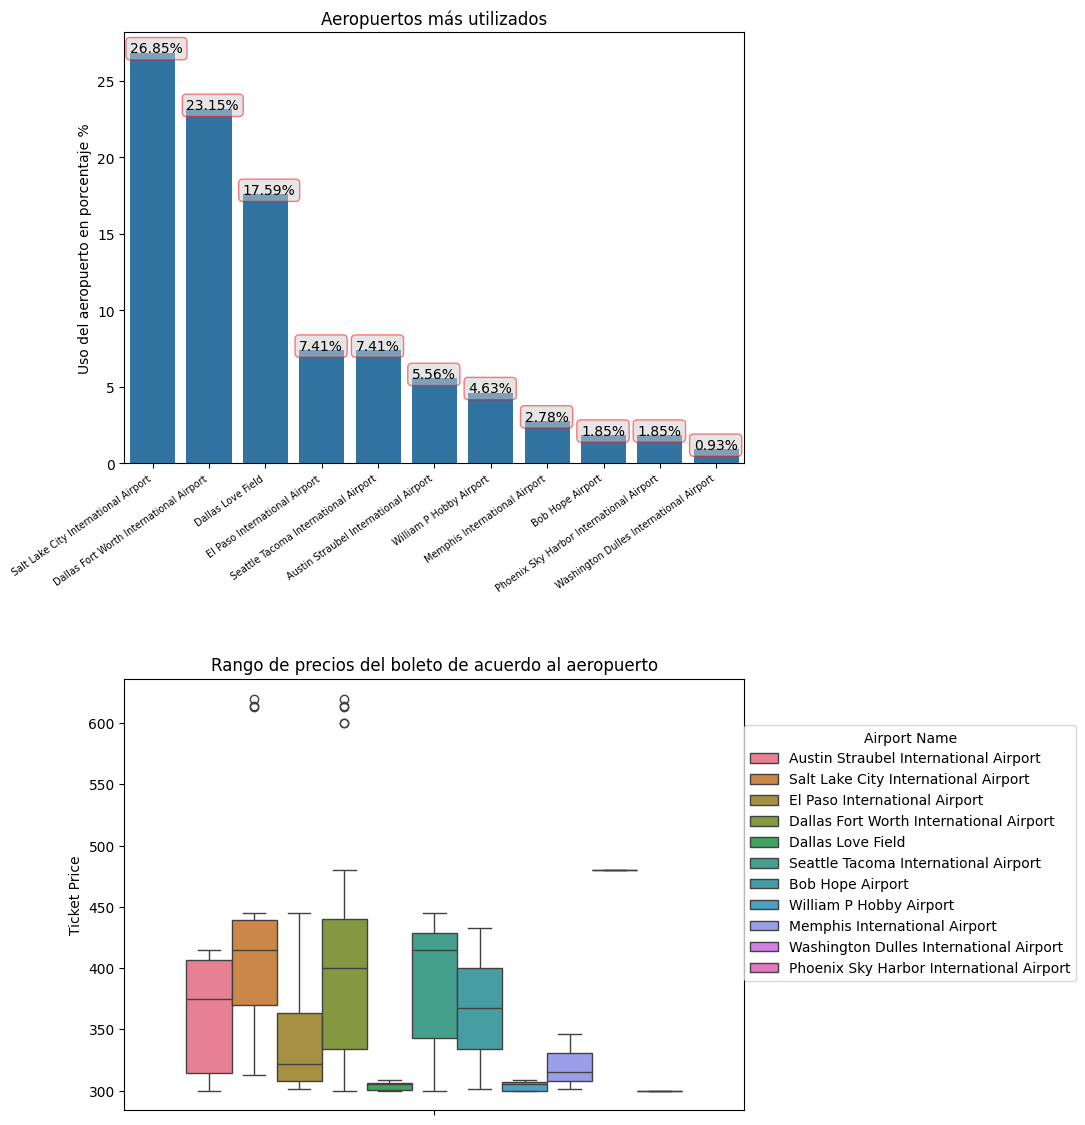

In [ ]:
values = Ori["Airport Name"].value_counts()
values = (values / values.sum()) * 100
fig, ax = plt.subplots(2,figsize=(8,14))
plt.subplots_adjust( hspace=0.5)
sns.barplot(data=values, ax = ax[0])
bbox = dict(boxstyle="round", fc="0.8", alpha = 0.5, color = "red")
for i in range(len(values)):
    ax[0].annotate(str(round(values[i],2))+"%", xy=(0.1, 0.1),xytext=(-0.4+i, values[i]),bbox=bbox)
ax[0].set_ylabel('Uso del aeropuerto en porcentaje %')
ax[0].set_xlabel('')
ax[0].set_title("Aeropuertos más utilizados")
plt.setp(ax[0].get_xticklabels(), rotation=35, horizontalalignment='right', fontsize='x-small')
sns.boxplot(y=Ori["Ticket Price"],hue=Ori["Airport Name"])
ax[1].set_title("Rango de precios del boleto de acuerdo al aeropuerto")
sns.move_legend(ax[1], (1,0.3))

In [ ]:
Reg2 = Reg
Reg2 = Reg2.drop("Type of Traveler",axis=1).corr()
print(Reg2["Ticket Price"])
Reg2

AA                              0.362682
Delta                          -0.070089
United                          0.200270
Days from Purchase to Travel   -0.258415
Business                       -0.147254
First Class                     0.078112
Origin                         -0.079771
Ticket Price                    1.000000
Lunes                          -0.051963
Martes                          0.171748
Miércoles                      -0.126173
Jueves                          0.057597
Viernes                        -0.080451
Sábado                         -0.068676
Trips                          -0.256126
Infrequent                      0.029747
Frequent                       -0.193850
Extreme                        -0.202628
Name: Ticket Price, dtype: float64


,AA,Delta,United,Days from Purchase to Travel,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Infrequent,Frequent,Extreme
AA,1.000000,-0.306484,-0.382971,-0.048224,0.017209,-0.180907,-0.181818,0.362682,-0.023999,0.176034,-0.092028,-0.016623,-0.134840,0.010265,-0.116309,-0.189948,-0.196150,-0.183605
Delta,-0.306484,1.000000,-0.266760,0.029532,0.265323,-0.267498,-0.086153,-0.070089,0.005211,-0.055777,0.095710,-0.033517,-0.076127,-0.021881,-0.089321,0.105689,0.038880,-0.096185
United,-0.382971,-0.266760,1.000000,0.013967,0.088721,-0.192450,-0.043519,0.200270,0.017675,-0.120386,0.015458,0.095491,0.200821,-0.042120,-0.005380,0.023020,0.159152,-0.016429
Days from Purchase to Travel,-0.048224,0.029532,0.013967,1.000000,0.079281,-0.138928,-0.018079,-0.258415,-0.046192,-0.117784,0.077002,-0.057426,0.149917,-0.067586,0.173504,-0.122336,0.095875,0.113976
Business,0.017209,0.265323,0.088721,0.079281,1.000000,-0.548821,0.036405,-0.147254,0.032931,-0.043486,-0.029976,0.049622,0.049088,-0.022956,-0.131444,0.053394,-0.081090,-0.135556
First Class,-0.180907,-0.267498,-0.192450,-0.138928,-0.548821,1.000000,0.263822,0.078112,0.030614,0.104257,-0.080322,-0.110264,-0.049690,0.024318,0.106222,0.119618,0.055132,0.199189
Origin,-0.181818,-0.086153,-0.043519,-0.018079,0.036405,0.263822,1.000000,-0.079771,0.094612,0.025541,-0.115035,-0.095581,0.084275,-0.036661,0.049305,0.006011,0.072725,0.040753
Ticket Price,0.362682,-0.070089,0.200270,-0.258415,-0.147254,0.078112,-0.079771,1.000000,-0.051963,0.171748,-0.126173,0.057597,-0.080451,-0.068676,-0.256126,0.029747,-0.193850,-0.202628
Lunes,-0.023999,0.005211,0.017675,-0.046192,0.032931,0.030614,0.094612,-0.051963,1.000000,-0.140435,-0.135243,-0.129960,-0.150600,-0.155594,0.103203,-0.096432,0.052322,0.063593
Martes,0.176034,-0.055777,-0.120386,-0.117784,-0.043486,0.104257,0.025541,0.171748,-0.140435,1.000000,-0.167483,-0.160941,-0.186501,-0.192685,-0.199338,0.166280,-0.083344,-0.154268


In [ ]:
mask = np.abs(Reg2) > .15
mask

,AA,Delta,United,Days from Purchase to Travel,Business,First Class,Origin,Ticket Price,Lunes,Martes,Miércoles,Jueves,Viernes,Sábado,Trips,Infrequent,Frequent,Extreme
AA,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,True,True
Delta,True,True,True,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
United,True,True,True,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False
Days from Purchase to Travel,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False
Business,False,True,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
First Class,True,True,True,False,True,True,True,False,False,False,False,False,False,False,False,False,False,True
Origin,True,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False
Ticket Price,True,False,True,True,False,False,False,True,False,True,False,False,False,False,True,False,True,True
Lunes,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False
Martes,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,False,True


In [ ]:
def graficar(X, Y, stan_res, model_loc):
  fig, axes = plt.subplots(2, 2, figsize=(12, 12))
########## Normal Probability Plot
  (quantiles, values), (slope, intercept, r) = stats.probplot(stan_res, dist='norm')
  axes[0, 0].plot(values, quantiles, 'ob')
  axes[0, 0].plot(quantiles * slope + intercept, quantiles, 'r')
  axes[0, 0].set_title('Normal Probability Plot')
  axes[0, 0].set_ylabel('Percent')
  axes[0, 0].set_xlabel('Standardized Residual')
  ticks_perc=[1,10,50,90,99]
  ticks_quan=[stats.norm.ppf(i/100.) for i in ticks_perc]
  axes[0, 0].set_xticks([-2,0,2,4])
  axes[0, 0].set_yticks(ticks_quan, ticks_perc)
  axes[0, 0].grid()

########### Versus Fits
  model_fitted_y = model_loc.fittedvalues
  sns.residplot(x=model_fitted_y, y=stan_res, ax=axes[0,1])
  axes[0, 1].set_title('Versus Fits')
  axes[0, 1].set_xlabel('Fitted Value')
  axes[0, 1].set_ylabel('Standardized Residual')
  axes[0, 1].set_xticks([0,4000,8000,12000,16000])
  axes[0, 1].set_yticks([-2,0,2,4])

########### Histogram
  stan_res = model_loc.get_influence().resid_studentized_internal
  sns.histplot(stan_res, bins=10, ax=axes[1,0])
  axes[0, 1].set_title('Histogram')
  axes[0, 1].set_ylabel('Frecuency')
  axes[0, 1].set_xlabel('Standardized Residual')
  axes[0, 1].set_yticks([0,2.5,5,7.5,10])

########### Versus Order
  axes[1, 1].scatter(X.index, stan_res)
  axes[1, 1].plot(X.index,stan_res)
  axes[1, 1].axhline(y=0,color='grey',linestyle=':')
  axes[1, 1].set_title('Versus Order')
  axes[1, 1].set_xlabel('Observation Order')
  axes[1, 1].set_ylabel('Standardized Residual')
  axes[1, 1].set_xticks(np.arange(0,31,2))
  axes[1, 1].set_yticks([-2,0,2,4]);

                         feature        VIF
0                          const  55.529334
1                             AA   2.545083
2                          Delta   2.187637
3                         United   2.302210
4   Days from Purchase to Travel   1.112637
5                       Business   1.600695
6                    First Class   2.359423
7                         Origin   1.254946
8                          Lunes   1.662190
9                         Martes   1.929985
10                     Miércoles   1.961105
11                        Jueves   1.979735
12                       Viernes   2.327664
13                        Sábado   2.121908
14                         Trips  14.753192
15                    Infrequent   3.952253
16                      Frequent   3.889740
17                       Extreme   8.604747
                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:

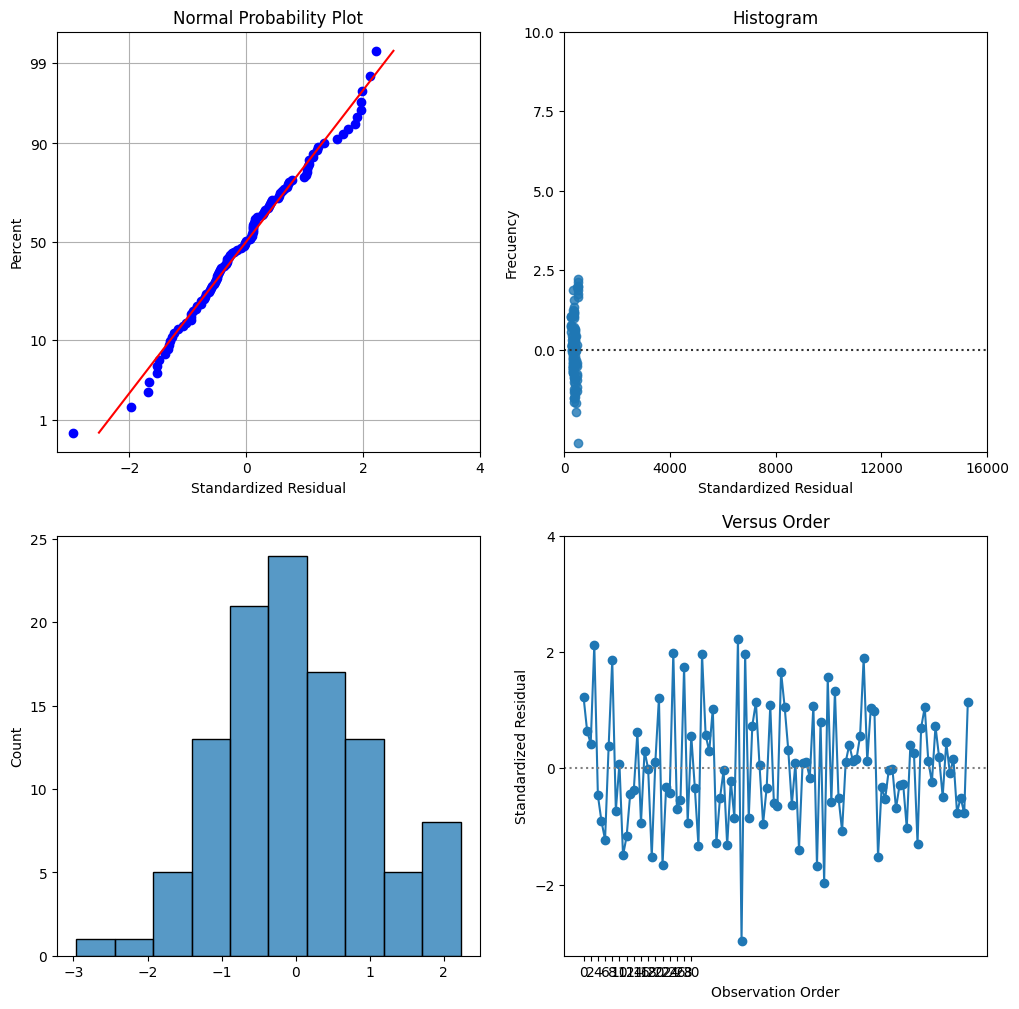

In [ ]:
y = Reg['Ticket Price']
x = Reg
x = x.drop(["Ticket Price", "Type of Traveler"],axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(np.array(x.values, dtype=float), i) for i in range(len(x.columns))]
print(vif_data)
print(model.summary())
B = model.params
standardized_residuals = model.get_influence().resid_studentized_internal
graficar(x,y,standardized_residuals,model)

In [ ]:
print("Precio = ",round(B[0],2), end = " ")
for i in range(1,B.size):
  if B[i] > 0:
    print(" + ", end = " ")
  print(round(B[i],2), B.index[i], end = " ")

Precio =  239.72  +  167.77 AA  +  143.81 Delta  +  176.75 United -0.4 Days from Purchase to Travel -33.69 Business  +  84.35 First Class  +  14.2 Origin -26.65 Lunes  +  0.09 Martes -22.25 Miércoles  +  9.56 Jueves -20.84 Viernes -19.06 Sábado  +  2.85 Trips  +  0.6 Infrequent -79.92 Frequent -54.37 Extreme 

In [ ]:
y = Reg['Ticket Price']
x = Reg
x = x.drop(["Ticket Price", "Type of Traveler"],axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     9.387
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.56e-13
Time:                        09:52:21   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1195.
Df Residuals:                      90   BIC:                             1243.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Martes",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     10.08
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.80e-14
Time:                        09:54:13   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1193.
Df Residuals:                      91   BIC:                             1238.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Infrequent",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     10.87
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.42e-14
Time:                        09:54:32   Log-Likelihood:                -579.31
No. Observations:                 108   AIC:                             1191.
Df Residuals:                      92   BIC:                             1234.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Jueves",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     11.73
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.52e-15
Time:                        09:54:51   Log-Likelihood:                -579.46
No. Observations:                 108   AIC:                             1189.
Df Residuals:                      93   BIC:                             1229.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Trips",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.634
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     12.53
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           2.05e-15
Time:                        09:55:14   Log-Likelihood:                -580.09
No. Observations:                 108   AIC:                             1188.
Df Residuals:                      94   BIC:                             1226.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Extreme",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     13.54
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           7.91e-16
Time:                        09:55:26   Log-Likelihood:                -580.56
No. Observations:                 108   AIC:                             1187.
Df Residuals:                      95   BIC:                             1222.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Miércoles",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     14.55
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           4.07e-16
Time:                        09:55:41   Log-Likelihood:                -581.41
No. Observations:                 108   AIC:                             1187.
Df Residuals:                      96   BIC:                             1219.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Sábado",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     15.82
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.85e-16
Time:                        09:55:52   Log-Likelihood:                -582.15
No. Observations:                 108   AIC:                             1186.
Df Residuals:                      97   BIC:                             1216.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Lunes",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     17.35
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           8.21e-17
Time:                        09:56:12   Log-Likelihood:                -582.92
No. Observations:                 108   AIC:                             1186.
Df Residuals:                      98   BIC:                             1213.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Viernes",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     19.28
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.44e-17
Time:                        09:56:24   Log-Likelihood:                -583.67
No. Observations:                 108   AIC:                             1185.
Df Residuals:                      99   BIC:                             1209.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Origin",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.576
Method:                 Least Squares   F-statistic:                     21.75
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.37e-17
Time:                        09:56:44   Log-Likelihood:                -584.42
No. Observations:                 108   AIC:                             1185.
Df Residuals:                     100   BIC:                             1206.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Business",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     24.27
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           1.27e-17
Time:                        09:56:59   Log-Likelihood:                -586.18
No. Observations:                 108   AIC:                             1186.
Df Residuals:                     101   BIC:                             1205.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
x = x.drop("Delta",axis=1)
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.81e-10
Time:                        09:58:30   Log-Likelihood:                -606.86
No. Observations:                 108   AIC:                             1226.
Df Residuals:                     102   BIC:                             1242.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

                        feature       VIF
0                         const  8.330563
1                            AA  1.301499
2                        United  1.296469
3  Days from Purchase to Travel  1.038183
4                   First Class  1.161270
5                      Frequent  1.061859
                            OLS Regression Results                            
Dep. Variable:           Ticket Price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     13.57
Date:                Tue, 09 Apr 2024   Prob (F-statistic):           3.81e-10
Time:                        09:59:34   Log-Likelihood:                -606.86
No. Observations:                 108   AIC:                             1226.
Df Residuals:                     102   BIC:                             1242.
Df Model:                           5                                     

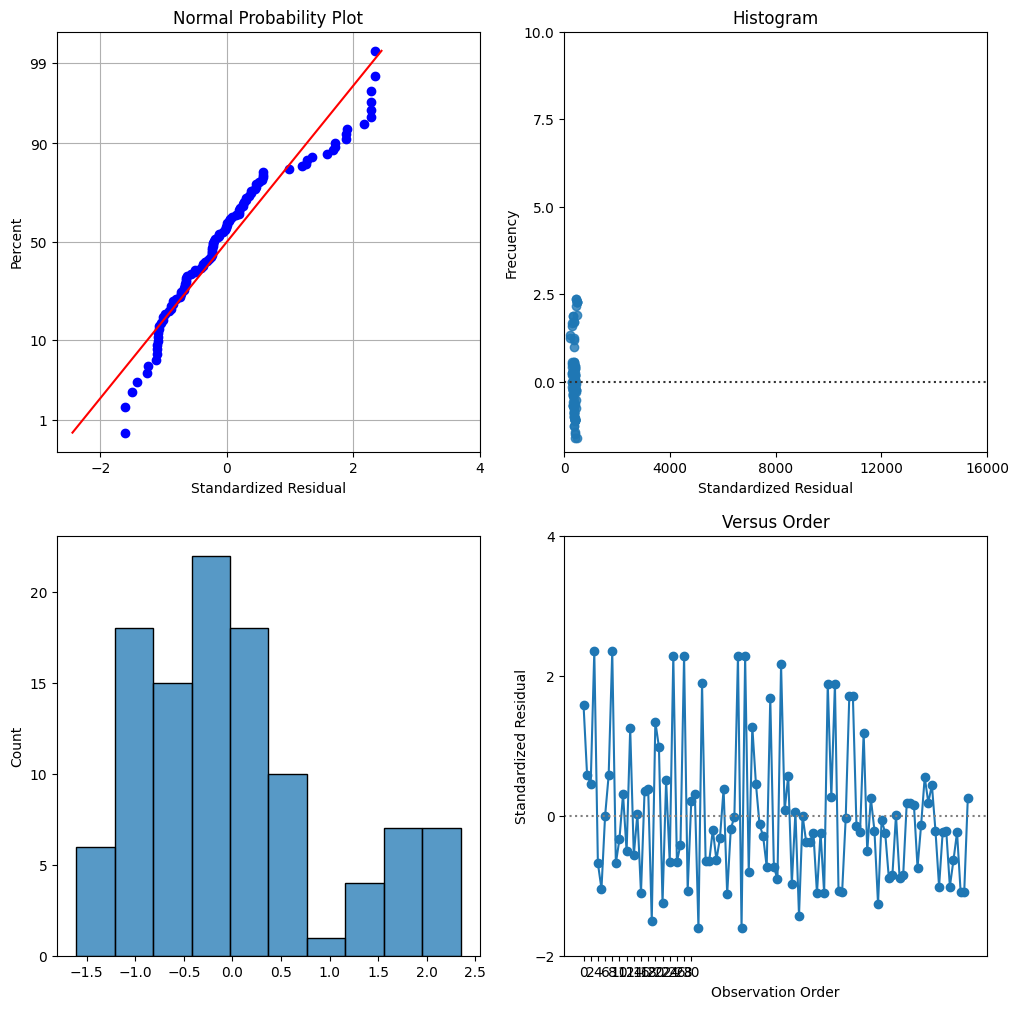

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(np.array(x.values, dtype=float), i) for i in range(len(x.columns))]
print(vif_data)
print(model.summary())
B = model.params
standardized_residuals = model.get_influence().resid_studentized_internal
graficar(x,y,standardized_residuals,model)

In [ ]:
print("Precio = ",round(B[0],2), end = " ")
for i in range(1,B.size):
  if B[i] > 0:
    print(" + ", end = " ")
  print(round(B[i],2), B.index[i], end = " ")

Precio =  330.67  +  104.0 AA  +  97.51 United -0.6 Days from Purchase to Travel  +  44.05 First Class -40.7 Frequent 